<a href="https://colab.research.google.com/github/johanv26/analisis_numerico/blob/master/4_7_problems_avance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
#paquetes de trabajo
!pip install sympy
import numpy as np
import sympy as sp
import cvxpy as cp
import math
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

Funciones de gradiente descente:

In [289]:
def descent_grad_optim_step(x, f, grad, epsi, max_iter): #Gradiente descendiente paso optimizado  
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  for i in range(max_iter):
    g = grad(*x)
    def phi(s):
      params=x-s*g.T
      params=params[0,:]  #change into single array
      #return f(x[0]-s*g[0],x[1]-s*g[1],x[2]-s*g[2])
      return f(*params)
    alpha = optimize.fminbound(phi, 0, 10)
  
    x = x - alpha * g.T
    x=x[0,:]
 
    xs[i+1,:] = x

    tol = np.linalg.norm(g)
    if tol < epsi:
      
      break
  return xs,i+1

In [290]:
def descent_grad_fixed_step(x, grad, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  
  for i in range(max_iter):
      g=grad(*x)
      x = x - a * g.T
      x=x[0,:]
      xs[i+1,:] = x
      tol = np.linalg.norm(grad(*x))
      if tol < epsi:
        break
  return xs,i+1

#Funciones de gradiente y hessiano

In [291]:

def gradient(f,*variables):
  n=len(variables)
  m=1
  grad=sp.zeros(n,m)
  i=0
  for var in variables:
    grad[i,0]=sp.diff(f,var)
    i+=1
  
  return grad

def hessian(f,*variables):
  n=len(variables)
  m=n
  hess=sp.zeros(n,m)
  
  for i in range(0,n):
    for j in range(0,n):
  
      first_diff=sp.diff(f,variables[j])
      second_diff=sp.diff(first_diff,variables[i])
      hess[i,j]=second_diff
  
  return hess

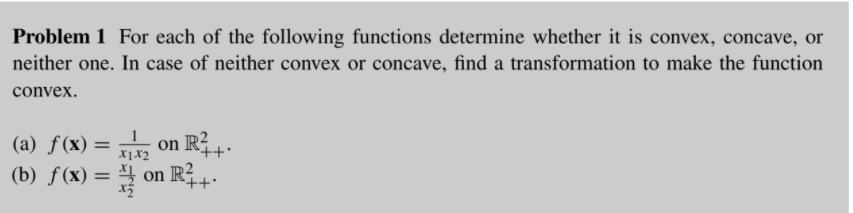

#a-)

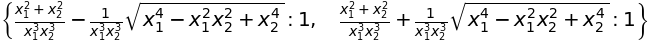

In [292]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=1/(x1*x2) 
grad=gradient(fx,x1,x2)
hess=hessian(fx,x1,x2)
grad_val=sp.lambdify([x1,x2],grad)
hess_val=sp.lambdify([x1,x2],hess)
sp.init_printing()
hess.eigenvals()

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


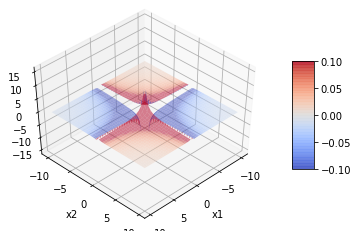

In [293]:
#printing
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from random import random, seed
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#print(x1_vals,x2_vals,z)
#print(xmin)

# Make data.
xmax=10
dx=0.25
XX = np.arange(-xmax, xmax, dx)
YY= np.arange(-xmax, xmax, dx)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# plot a 3d scatter plot



ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

Realizando analisis se puede 

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


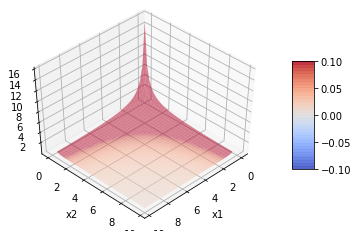

In [294]:
xmax=10
dx=0.25
XX = np.arange(0, xmax, dx)
YY= np.arange(0, xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

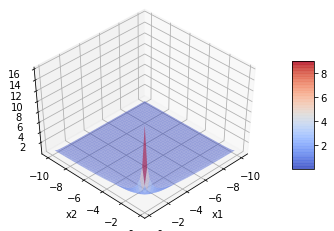

In [295]:
xmax=10
dx=0.25
XX = np.arange(-xmax,0, dx)
YY= np.arange(-xmax, 0, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


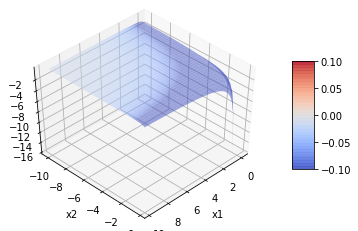

In [296]:
xmax=10
dx=0.25
XX = np.arange(0,xmax, dx)
YY= np.arange(-xmax, 0, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


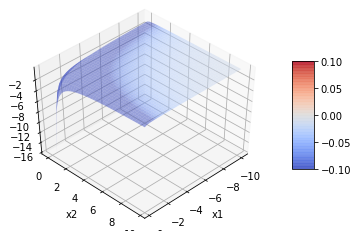

In [297]:
xmax=10
dx=0.25
XX = np.arange(-xmax, 0, dx)
YY= np.arange(0,xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

#b-)

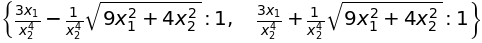

In [298]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=x1/(x2**2) 
grad=gradient(fx,x1,x2)
hess=hessian(fx,x1,x2)
grad_val=sp.lambdify([x1,x2],grad)
hess_val=sp.lambdify([x1,x2],hess)
sp.init_printing()
hess.eigenvals()

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


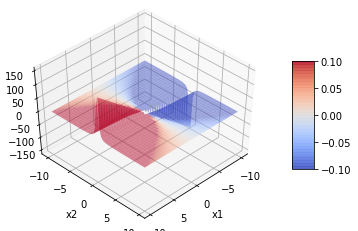

In [299]:
#printing
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from random import random, seed
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#print(x1_vals,x2_vals,z)
#print(xmin)

# Make data.
xmax=10
dx=0.25
XX = np.arange(-xmax, xmax, dx)
YY= np.arange(-xmax, xmax, dx)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# plot a 3d scatter plot



ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


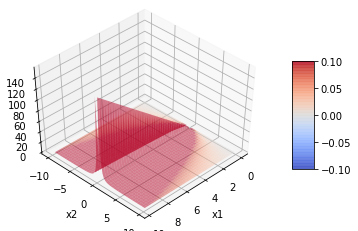

In [300]:
xmax=10
dx=0.25
XX = np.arange(0, xmax, dx)
YY= np.arange(-xmax,xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


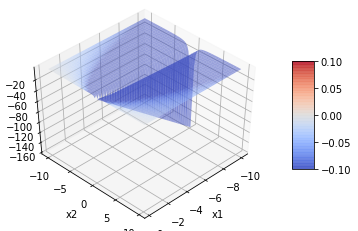

In [301]:
xmax=10
dx=0.25
XX = np.arange(-xmax, 0, dx)
YY= np.arange(-xmax,xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

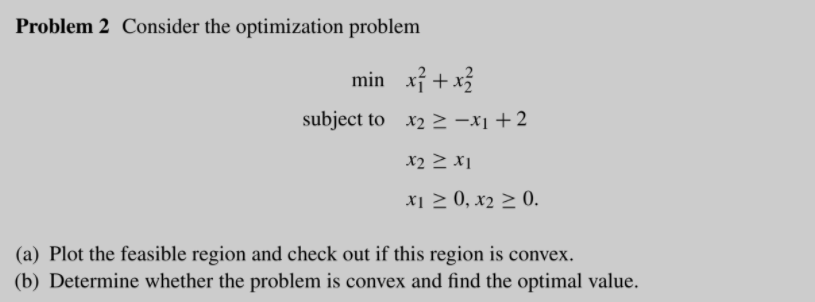

In [302]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=x1**2+x2**2
plane1=x1+x2-2  #>=0
plane2=x2-x1  #>=0

sp.init_printing()


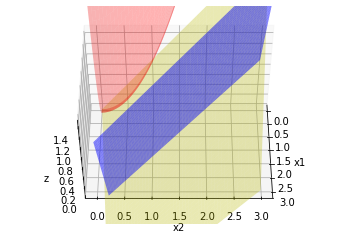

In [303]:
#printing
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from random import random, seed
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#print(x1_vals,x2_vals,z)
#print(xmin)

# Make data.
dx=0.01
xmax=3
XX = np.arange(0, xmax, dx)#x1>=0
YY= np.arange(0, xmax, dx)#x2>=0

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)
P1=sp.lambdify([x1,x2],plane1)
P2=sp.lambdify([x1,x2],plane2)
Z=F(X,Y)
Z1=P1(X,Y)
Z2=P2(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, color='red',alpha=0.3)
ax.plot_surface(X, Y, Z1,color='blue',alpha=0.5)
ax.plot_surface(X, Y, Z2,color='yellow',alpha=0.3)
# Add a color bar which maps values to colors.


# plot a 3d scatter plot



ax.view_init(50,0)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
ax.set_zlim(0, 1.5)#P>=0
plt.show()

#B-)Optimizacion


In [304]:
n=1
x1=cp.Variable(1)
x2=cp.Variable(1)
cost=x1**2+x2**2
prob = cp.Problem(cp.Minimize(cost),
                  [x2>=-x1+2,
                  x2>=x1,
                   x2>=0,
                   x1>=0]
                  
)
prob.solve()


print("\nThe optimal value is", prob.value)
print("A solution x is")
print(f"x1= {x1.value},x2={x2.value}")


The optimal value is 2.000000000000001
A solution x is
x1= [1.],x2=[1.]


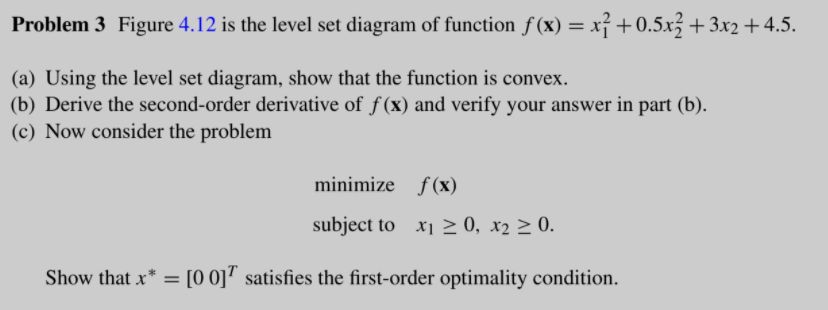

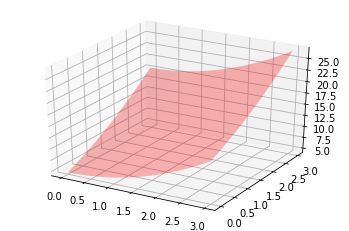

In [305]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=x1**2+0.5*x2**2+3*x2+4.5
dx=0.01
xmax=3
xmin=0
XX = np.arange(xmin, xmax, dx)#x1>=0
YY= np.arange(xmin, xmax, dx)#x2>=0

X, Y = np.meshgrid(XX, YY)

F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)



fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, color='red',alpha=0.3)

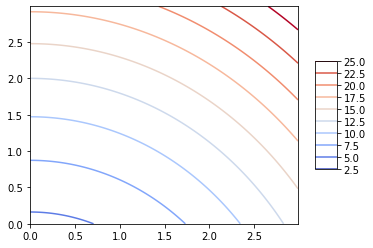

In [306]:
contour_levels=np.arange(25,0,-2.5)
#contour = plt.contour(X, Y,Z,np.flip(contour_levels))
contour = plt.contour(X, Y,Z,np.flip(contour_levels),cmap=cm.coolwarm)
plt.colorbar(contour, shrink=0.5, aspect=5)

#B-)

In [307]:
hess=hessian(fx,x1,x2)
print('Criterio de la segunda derivada :\n',hess)
valores_propios=hess.eigenvals()
print('Los valores propios son: ',valores_propios,'...osea 2 y 1')
print('Como son positivos ambos estamos con una funcion con minimo')

Criterio de la segunda derivada :
 Matrix([[2, 0], [0, 1.00000000000000]])
Los valores propios son:  {2: 1, 1: 1} ...osea 2 y 1
Como son positivos ambos estamos con una funcion con minimo


#C-) Optimizacion

In [308]:
n=1
x1=cp.Variable(1)
x2=cp.Variable(1)
cost=x1**2+0.5*x2**2+3*x2+4.5
prob = cp.Problem(cp.Minimize(cost),
                  [x2>=0,
                   x1>=0]
                  
)
prob.solve()


print("\nThe optimal value is", prob.value)
print("A solution x is")
print(f"x1= {x1.value},x2={x2.value}")


The optimal value is 4.5
A solution x is
x1= [0.],x2=[2.96289305e-25]


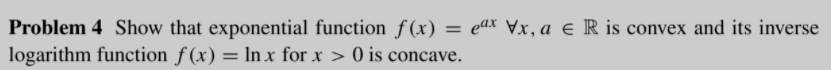

Convex function


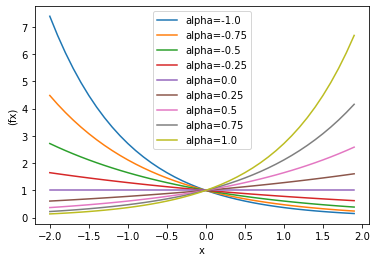

In [309]:
# Make data.
dalpha=0.25
alpha=np.arange(-1,1+dalpha,dalpha)
x=np.arange(-2,2,0.1)
for a in alpha:
  y=np.exp(x*a)
  plt.plot(x,y,label=f'alpha={a}')
  #print(y)

plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
print('Convex function')


Concave function


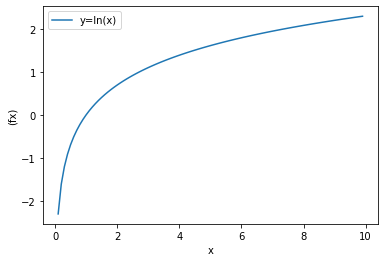

In [310]:
# Make data.

x=np.arange(0.1,10,0.1)

y=np.log(x)
plt.plot(x,y,label=f'y=ln(x)')
  #print(y)

plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
print('Concave function')

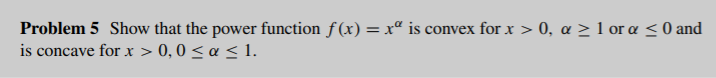

concavo=>Concavo hacia abajo

convex=>Concavo hacia arriba

Convex function


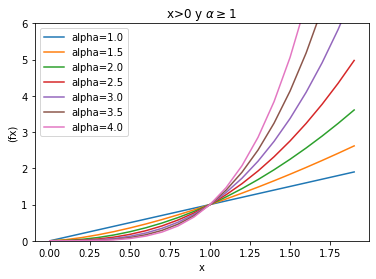

In [311]:
# Make data.
dalpha=0.5
alpha=np.arange(1,4+dalpha,dalpha)
x=np.arange(0,2,0.1)
for a in alpha:
  y=x**a
  plt.plot(x,y,label=f'alpha={a}')
  #print(y)

plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
plt.ylim(0,6)
plt.title(r'x>0 y $\alpha \geq$1 ')
print('Convex function')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in reciprocal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


Convex function


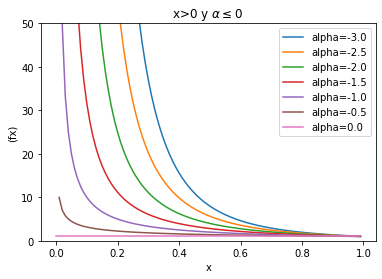

In [312]:
# Make data.
dalpha=0.5
alpha=np.arange(-3,0+dalpha,dalpha)
x=np.arange(0,1,0.01)
for a in alpha:
  y=x**a
  plt.plot(x,y,label=f'alpha={a}')
  #print(y)

plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
plt.ylim(0, 50)
plt.title(r'x>0 y $\alpha \leq$0 ')
print('Convex function')

Concave function


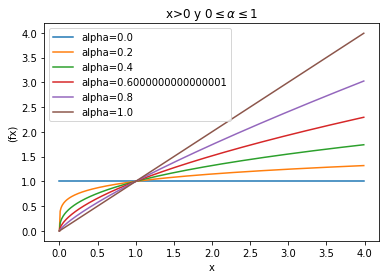

In [313]:
# Make data.
dalpha=0.2
alpha=np.arange(0,1+dalpha,dalpha)
x=np.arange(0,4,0.01)
for a in alpha:
  y=x**a
  plt.plot(x,y,label=f'alpha={a}')
  #print(y)

plt.xlabel('x')
plt.ylabel('(fx)')
plt.legend()
plt.title(r'x>0 y $0 \leq \alpha \leq$1')
print('Concave function')

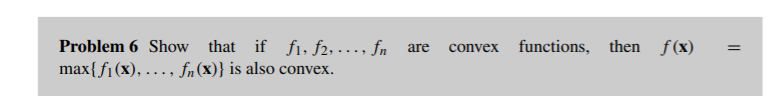

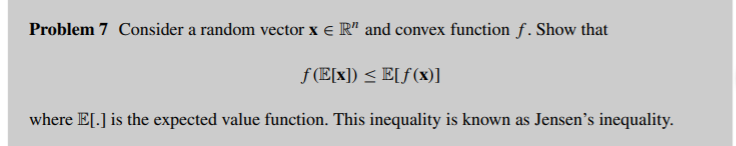

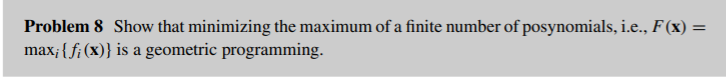